In [1]:
### Here we are going to import packages for our analysis
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import itertools

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import os
import gensim
from gensim import corpora, models
import pandas as pd
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import os
import nltk.stem as stemmer
from pprint import pprint
import itertools
import requests
import gensim
import pandas as pd
import os
import collections
import smart_open
from nltk.tokenize import RegexpTokenizer
import gensim.models.doc2vec
import multiprocessing
import numpy as np
from scipy.sparse import csr_matrix
import nltk.tokenize 
from gensim.models.doc2vec import TaggedDocument
import pickle
import seaborn as sns
from string import digits
from collections import namedtuple
import math
import matplotlib 
from datetime import timedelta
import matplotlib.pyplot as plt
import re
import pickle
import sys
import re
import csv
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
from itertools import chain
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sys
import numpy as np
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import csv
from sklearn.externals import joblib
from string import digits
import bz2
from collections import Counter
import plotly
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
plotly.tools.set_credentials_file(username='alphonse.m.simon', api_key='tL4FDjpWNTU1xUf5sXEl')
from bs4 import BeautifulSoup
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import plotly.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
stemmer = PorterStemmer()
np.random.seed(2018)
nltk.download('wordnet')
import xlsxwriter
from xlrd import open_workbook

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alpho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alpho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [3]:
path_link = "C:/Users/alpho/Dropbox/NLP - STEM"
os.chdir(path_link)

In [5]:
work_process = pd.read_excel(open('./Data/NLP_STEM Data_final.xlsx','rb'), sheet_name=2)
community_college = pd.read_excel(open('./Data/NLP_STEM Data_final.xlsx','rb'), sheet_name=1)

In [6]:
work_process['word count'] = work_process['Text'].map(lambda x: x.count(" "))

In [7]:
work_process = work_process[work_process['word count'] > 5]
work_process = work_process.append(community_college, ignore_index=True)

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [8]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [9]:
work_process['clean_texts'] = work_process['Text'].map(preprocess)

In [10]:
data_words = work_process['clean_texts'].tolist()

In [11]:
stopwords = ['student', 'cours', 'includ', 'network', 'topic', 'system', 'concept', 'fundament', 'skill', 'learn', 
            'complet', 'introduc', 'inform', 'cover', 'abil', 'abl']
for i in range(len(data_words)): 
    for x in stopwords: 
        try: 
            data_words[i][:] = [z for z in data_words[i] if z != x]
        except ValueError: 
            continue

In [12]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\m

In [13]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])

In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]


In [16]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adher', 1),
  ('apprentic', 3),
  ('basic', 3),
  ('commun', 1),
  ('demonstr', 1),
  ('establish', 1),
  ('ethic', 1),
  ('follow', 1),
  ('function', 1),
  ('interperson', 1),
  ('knowledg', 1),
  ('organ', 2),
  ('polici', 1),
  ('principl', 1),
  ('procedur', 1),
  ('rule', 1),
  ('safeti', 1),
  ('structur', 1),
  ('workplac', 1)]]

In [17]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"certif" + 0.034*"window" + 0.031*"configur" + 0.029*"prepar" + '
  '0.028*"exam" + 0.022*"microsoft" + 0.022*"servic" + 0.019*"server" + '
  '0.018*"design" + 0.017*"linux"'),
 (1,
  '0.094*"secur" + 0.029*"polici" + 0.027*"media" + 0.026*"implement" + '
  '0.021*"hand" + 0.017*"identifi" + 0.016*"manag" + 0.015*"issu" + '
  '0.014*"develop" + 0.014*"fall"'),
 (2,
  '0.034*"softwar" + 0.032*"basic" + 0.029*"oper" + 0.028*"technolog" + '
  '0.024*"hardwar" + 0.023*"commun" + 0.018*"person" + 0.018*"comput" + '
  '0.017*"emphasi_place" + 0.015*"provid"'),
 (3,
  '0.041*"write" + 0.020*"pend" + 0.020*"analysi" + 0.019*"form" + '
  '0.016*"mathemat" + 0.014*"econom" + 0.014*"social" + 0.014*"varieti" + '
  '0.012*"think" + 0.011*"consum"'),
 (4,
  '0.045*"semest_offer" + 0.036*"busi" + 0.036*"process" + 0.034*"develop" + '
  '0.018*"educ" + 0.016*"strategi" + 0.015*"produc" + 0.014*"assess" + '
  '0.013*"colleg" + 0.013*"decis"'),
 (5,
  '0.065*"program" + 0.050*"databas" + 

In [19]:
lda_dictionary_temp = {}
lda_dictionary = {}
lda_dataframe = {}
for x in lda_model.print_topics(): 
    lda_dictionary_temp[str(x[0])] = x[1].split('+')
    lda_dictionary_temp[str(x[0])] = [word.split('*') for word in lda_dictionary_temp[str(x[0])]]

In [20]:
df = pd.DataFrame(lda_dictionary_temp['0'][1:],columns= ['Coefficient/weight', 'Stub/word'])

In [21]:
for i in range(0,4):
    lda_dictionary[str(i)] = pd.DataFrame(lda_dictionary_temp[str(i)][0:],columns= ['Weight', 'Word'])

In [22]:
i = 3
z = 0
writer = pd.ExcelWriter('C:/Users/alpho/Dropbox/NLP - STEM/Output/Topics by WP.xlsx', engine='xlsxwriter')
workbook  = writer.book

for x in lda_dictionary: 
    i = i + 2
    lda_dictionary[x].to_excel(writer, sheet_name='Topics by WP', startcol = i, startrow = 2, index=False)
x = 3
worksheet = writer.sheets['Topics by WP']
for i in range(0,len(lda_dictionary)): 
    x = x + 2
    z = z+1
    worksheet.write(1, x, "Topic " + str(0 + z))

writer.save()



In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.428803572476175

Coherence Score:  0.3355091945796831


In [24]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.085144  0.168760       1        1  23.109816
6      0.020594 -0.133297       2        1  16.558033
0      0.175280  0.149177       3        1  15.419635
7      0.106466  0.035863       4        1  11.582044
1      0.062004 -0.074412       5        1  10.535334
5      0.037944 -0.183477       6        1   9.206818
3     -0.320949  0.154016       7        1   8.741735
4     -0.166483 -0.116630       8        1   4.846581, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
105   Default  235.000000         secur  235.000000  30.0000  30.0000
34    Default  149.000000       program  149.000000  29.0000  29.0000
135   Default  139.000000        certif  139.000000  28.0000  28.0000
287   Default  138.000000       project  138.000000  27.0000  27.0000
297   Default  157.000000       databas  157.000000  26.0000  26.0000
170   Default  141.000000          data  141.000000  25.0000  25.0000
205   Default  156.000000       softwar  156.000000  24.0000  24.0000
31    Default  225.000000       develop  225.000000  23.0000  23.0000
349   Default  103.000000         write  103.000000  22.0000  22.0000
38    Default  100.000000      document  100.000000  21.0000  21.0000
2     Default  158.000000         basic  158.000000  20.0000  20.0000
162   Default  102.000000        window  102.000000  19.0000  19.0000
72    Default  103.000000          user  103.000000  18.0000  18.0000
46    Default   80.000000       process   80.000000  17.0000  17.0000
120   Default  176.000000      configur  176.000000  16.0000  16.0000
54    Default  134.000000        prepar  134.000000  15.0000  15.0000
141   Default   80.000000          busi   80.000000  14.0000  14.0000
129   Default  215.000000          oper  215.000000  13.0000  13.0000
913   Default   80.000000          exam   80.000000  12.0000  12.0000
124   Default  104.000000       hardwar  104.000000  11.0000  11.0000
191   Default  137.000000     technolog  137.000000  10.0000  10.0000
126   Default  167.000000        instal  167.000000   9.0000   9.0000
95    Default  114.000000       support  114.000000   8.0000   8.0000
1650  Default   42.000000  semest_offer   42.000000   7.0000   7.0000
77    Default   53.000000       languag   53.000000   6.0000   6.0000
3     Default  104.000000        commun  104.000000   5.0000   5.0000
12    Default   71.000000        polici   71.000000   4.0000   4.0000
68    Default  271.000000        design  271.000000   3.0000   3.0000
706   Default   53.000000         media   53.000000   2.0000   2.0000
185   Default   97.000000       problem   97.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
1665   Topic8    5.584113      quantiti    6.498899   2.8752  -5.0884
1664   Topic8    5.584113     phenomena    6.498899   2.8752  -5.0884
1663   Topic8    5.584113      numeraci    6.498899   2.8752  -5.0884
1661   Topic8    5.584113         decod    6.498899   2.8752  -5.0884
1660   Topic8    5.584113         civic    6.498899   2.8752  -5.0884
569    Topic8    5.090834       conduct    6.002995   2.8621  -5.1809
735    Topic8    5.005982       potenti    5.919219   2.8593  -5.1977
82     Topic8    4.833497         adapt    5.746774   2.8538  -5.2328
1454   Topic8    4.467853        hybrid    5.380009   2.8411  -5.3115
631    Topic8    4.318888        stress    5.232165   2.8351  -5.3454
400    Topic8    9.219425        growth   11.185793   2.8336  -4.5871
236    Topic8   14.676204      strategi   21.312241   2.6538  -4.1221
1023   Topic8    8.883771        academ   12.177718   2.7115  -4.6241
42     Topic8   13.798659        produc   22.188908   2.5519  -4.1838
140    Topic8   12.615760        assess   20.958229   2.5193  -4.2734
141    Topic8   32.960701          busi   80.531616   2.1

In [25]:
filename = 'lda_model'
outfile = open(filename,'wb')
pickle.dump(lda_model,outfile)
outfile.close()

In [26]:
filename = 'corpus'
outfile = open(filename,'wb')
pickle.dump(corpus,outfile)
outfile.close()

In [27]:
filename = 'id2word'
outfile = open(filename,'wb')
pickle.dump(id2word,outfile)
outfile.close()

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:195: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\alpho\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:317: RuntimeWarning:

invalid value encountered in double_scalars



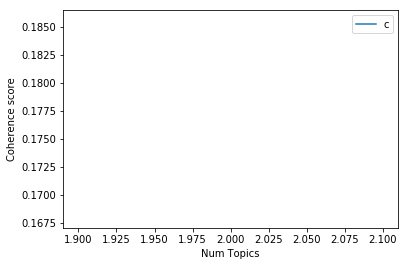

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
print(coherence_values)

[0.17677255495114558, nan, nan, nan, nan, nan, nan]
